**Data source**

This is a dataset about online retail store orders.

Link to original source: https://www.kaggle.com/datasets/ishanshrivastava28/tata-online-retail-dataset?select=Online+Retail+Data+Set.csv

**Objective**

The manager of this online retail store want to identify business performance and plan strategy for next year based on this data. Our task is to evaluate the current business performance (revenue) and suggest metrics for expansion. Therefore, we should have a deep understanding of this data and provide useful insights on:

1. Revenue: Understand revenue streams and sources. This involves examining various aspects, such as product categories, customer segments, sales channels, and geographic regions.

2. Marketing Effectiveness: Delve into metrics related to customer acquisition, retention, and engagement. This could include metrics like conversion rates, customer lifetime value, and engagement on different marketing channels (social media, email campaigns, etc.).

3. Demographic Insights: Understand the demographics of the customer base, such as location, and buying behavior. This information can inform personalized marketing strategies and product offerings tailored to different segments.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import statistics
import calendar

In [2]:
data = pd.read_csv('Online Retail Data Set.csv', encoding= 'unicode_escape')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
print('The percentage of null values across the total records: ')
data.isnull().sum() / len(data)

The percentage of null values across the total records: 


InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [6]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Overview of dataset**

Overall, this dataset includes 8 features with 541909 records. Among them, there are 3 numerical features and 5 objects.

        1. InvoiceNo: Invoice number.

        2. StockCode: Product code. Unique for each product.

        3. Description: Description for product in each invoice.

        4. Quantity: The quantities of each product per transaction.

        5. InvoiceDate: Invoice date and time. The day and time when each transaction was generated.

        6. UnitPrice: Product price per unit.

        7. CustomerID: Customer number, uniquely assigned to each customer.

        8. Country: Country name.

- Three numerical features are Quantity, UnitPrice and CustomerID. InvoiceDate should be a datetime type. The remaining 4 attributes can be considered as categorical or discrete, depending on the number of unique data points.

- There're 2 features with null values: Description and CustomerID. Null values in CustomerID account for approximately 25% of the data.


- Both Quantity and UnitPrice have negative values. This is abnormal. The values of these two variables also have extreme outliers (max too far from Q3).

I'll delve into some feature to analyze them more thoroughly.


**Table of contents:**

>[InvoiceNo exploration](#scrollTo=SBlZkwAJV1pC)

>[Data cleaning](#scrollTo=0hvlhrdeGrDv)

>[StockCode, Description and Country exploration](#scrollTo=hZPO8QN7lCPF)

>[Numerical features exploration](#scrollTo=jRIYMfAfqVX1)

>[Revenue Analysis](#scrollTo=IdOwP1mgMM9X)

>[Customer Segmentation](#scrollTo=EIqaZYNwm_-D)



### InvoiceNo exploration


In [7]:
data['InvoiceNo'].value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64

There're 25900 unique orders in this dataset.

Almost invoice numbers in this dataset are represented by string of number, some contain letters (ex 'C558901'). I'll check which letters are used here and their positions to find out their meanings.

In [8]:
# letters list
letter = set()

# corresponding position of each letters
letter_pos = set()

for index, value in data.iterrows():
    for id, char in enumerate(value['InvoiceNo']):
        if char.isalpha():
            letter.add(char)
            letter_pos.add(id)

In [9]:
print('Unique letters in invoice no: ', letter)
print('Position: ', letter_pos)

Unique letters in invoice no:  {'C', 'A'}
Position:  {0}


As we can see, invoice number which has letter only contain 'A' or 'C' and their position are at the begining of string.  

In [10]:
data[data['InvoiceNo'].str.contains('A')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,12-08-2011 14:50,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,12-08-2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,12-08-2011 14:52,-11062.06,NaN,United Kingdom


In [11]:
data[data['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


At the first look, there are only 3 records that have invoices starting with 'A', all of them have a description of "Adjust bad debt". Besides, there are 9288 records that have invoices starting with 'C', all of them seem to have negative quantities. 'C' maybe represents for cancellation.

Beside, from the summary of descriptive statistic for all dataset, both Quantity and UnitPrice have negative values which i have mentioned as abnormal. I think these records may have a relationship with cancelled orders. Therefore I'll check them to know if it's true and the reason behind.





In [12]:
data['Cancel'] = data['InvoiceNo'].apply(lambda x: 1 if x.startswith('C') else 0)

In [13]:
def check_sign(record):
    if (record['Quantity'] >= 0) & (record['UnitPrice'] >= 0):
        return 'Both positive'
    elif (record['Quantity'] >= 0) & (record['UnitPrice'] < 0):
        return 'Negative unit price'
    elif (record['Quantity'] < 0) & (record['UnitPrice'] >= 0):
        return 'Negative quantity'
    else:
        return 'Both negative'

data['PriceQuantitySign'] = data.apply(check_sign, axis=1)

In [14]:
cross_table = pd.crosstab(data['Cancel'], data['PriceQuantitySign'])
cross_table

PriceQuantitySign,Both positive,Negative quantity,Negative unit price
Cancel,,,
0,531283,1336,2
1,0,9288,0


From cross table for cancellation and sign of quantity and unit price:
- All cancelled orders have negative quantities.
- There're also some orders without cancellation but have negative unit prices and quantities.

In [15]:
data[(data['Cancel'] == 0) & (data['PriceQuantitySign'] == 'Negative unit price')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel,PriceQuantitySign
299983,A563186,B,Adjust bad debt,1,12-08-2011 14:51,-11062.06,NaN,United Kingdom,0,Negative unit price
299984,A563187,B,Adjust bad debt,1,12-08-2011 14:52,-11062.06,NaN,United Kingdom,0,Negative unit price


In [16]:
data[(data['Cancel'] == 0) & (data['PriceQuantitySign'] == 'Negative quantity')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel,PriceQuantitySign
2406,536589,21777,NaN,-10,01-12-2010 16:50,0.0,NaN,United Kingdom,0,Negative quantity
4347,536764,84952C,NaN,-38,02-12-2010 14:42,0.0,NaN,United Kingdom,0,Negative quantity
7188,536996,22712,NaN,-20,03-12-2010 15:30,0.0,NaN,United Kingdom,0,Negative quantity
7189,536997,22028,NaN,-20,03-12-2010 15:30,0.0,NaN,United Kingdom,0,Negative quantity
7190,536998,85067,NaN,-6,03-12-2010 15:30,0.0,NaN,United Kingdom,0,Negative quantity
...,...,...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,07-12-2011 18:36,0.0,NaN,United Kingdom,0,Negative quantity
535335,581212,22578,lost,-1050,07-12-2011 18:38,0.0,NaN,United Kingdom,0,Negative quantity
535336,581213,22576,check,-30,07-12-2011 18:38,0.0,NaN,United Kingdom,0,Negative quantity
536908,581226,23090,missing,-338,08-12-2011 09:56,0.0,NaN,United Kingdom,0,Negative quantity


- Records with negative unit prices that are not cancelled are considered bad debts. CustomerIDs are NaN. Therefore they can be dropped.
- Records with negative quantities that are not cancelled could be due to shortages or damages, based on the description. Besides, unit price seem to be all zeros and customer ids are nan. Let's examine the description, unit price and customerid of these records.

In [17]:
pd.set_option('display.max_rows', None)
data[(data['Cancel'] == 0) & (data['PriceQuantitySign'] == 'Negative quantity')]['Description'].value_counts()

check                                  120
damages                                 45
damaged                                 42
?                                       41
sold as set on dotcom                   20
Damaged                                 14
thrown away                              9
Unsaleable, destroyed.                   9
??                                       7
wet damaged                              5
damages?                                 5
ebay                                     5
smashed                                  4
missing                                  3
wet pallet                               3
CHECK                                    3
sold as 1                                2
incorrect stock entry.                   2
crushed                                  2
adjustment                               2
wet/rusty                                2
reverse 21/5/10 adjustment               2
?missing                                 2
damages wax

In [18]:
pd.set_option('display.max_rows', 10)

In [19]:
data[(data['Cancel'] == 0) & (data['PriceQuantitySign'] == 'Negative quantity')]['UnitPrice'].value_counts()

0.0    1336
Name: UnitPrice, dtype: int64

In [20]:
data[(data['Cancel'] == 0) & (data['PriceQuantitySign'] == 'Negative quantity')]['CustomerID'].value_counts(dropna=False)

NaN    1336
Name: CustomerID, dtype: int64

The results indicate that my prediction was correct.

To sum up, all orders which are cancelled or orders with negative unit price, negative quantity don't contribute to total revenue. Therefore i'll delete all of them.

### Data cleaning

In [21]:
data.duplicated().sum()

5268

In [22]:
data = data.drop_duplicates()

In [23]:
data = data[(data['UnitPrice'] > 0) & (data['Quantity'] > 0)]

As customer with null id don't support us in customer analysis, i'll drop them all.

In [24]:
data = data.dropna(subset=['CustomerID'])
data['Description'] = data['Description'].str.strip()
data['Description'] = data['Description'].fillna('Unknow description')

<ipython-input-24-1f39bf3730be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Description'] = data['Description'].str.strip()
<ipython-input-24-1f39bf3730be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Description'] = data['Description'].fillna('Unknow description')


In [25]:
data = data.drop(columns={'Cancel', 'PriceQuantitySign'}, axis=1)

**Convert data type and create revenue column**

In [26]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [27]:
data['time'] = data['InvoiceDate'].dt.time
data['day'] = data['InvoiceDate'].dt.day
data['month'] = data['InvoiceDate'].dt.month
data['year'] = data['InvoiceDate'].dt.year

In [28]:
data['Revenue'] = data['UnitPrice']*data['Quantity']

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   time         392692 non-null  object        
 9   day          392692 non-null  int64         
 10  month        392692 non-null  int64         
 11  year         392692 non-null  int64         
 12  Revenue      392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 41.9+ MB


In [30]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,time,day,month,year,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,08:26:00,12,1,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,08:26:00,12,1,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,08:26:00,12,1,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,08:26:00,12,1,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,08:26:00,12,1,2010,20.34


In [31]:
data.describe()

,Quantity,UnitPrice,CustomerID,day,month,year,Revenue
count,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865,15.704450,6.942077,2010.934631,22.631500
std,180.492832,22.241836,1713.539549,8.047327,3.328222,0.247177,311.099224
min,1.000000,0.001000,12346.000000,1.000000,1.000000,2010.000000,0.001000
25%,2.000000,1.250000,13955.000000,10.000000,4.000000,2011.000000,4.950000
50%,6.000000,1.950000,15150.000000,15.000000,7.000000,2011.000000,12.450000
75%,12.000000,3.750000,16791.000000,22.000000,10.000000,2011.000000,19.800000
max,80995.000000,8142.750000,18287.000000,31.000000,12.000000,2011.000000,168469.600000


Now that the data has been cleaned up, I will proceed with a more detailed exploration.

### StockCode, Description and Country exploration

These are categorical attributes. I'll count for unique values of them.

In [32]:
print('Stock Code\'s unique values: ', data['StockCode'].nunique())
print('Description\'s unique values: ', data['Description'].nunique())
print('Country\'s unique values: ', data['Country'].nunique())

Stock Code's unique values:  3665
Description's unique values:  3866
Country's unique values:  37


From the above results, it can be observed that this online retail store's business network is quite extensive (over 37 countries). Let's see the number of orders in each country and stock code. I'll only check for top 10 in term of order quantities.


In [33]:
def show_top10_barplot(feature, xlabel, ylabel):
    sns.barplot(x=feature.values, y=feature.index, orient='h')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('Top 10 ' + ylabel + ' by ' + xlabel)

    for i, value in enumerate(feature.values):
        plt.annotate(f'{value:.0f}', (value, i), ha='left', va='center')

    plt.show()

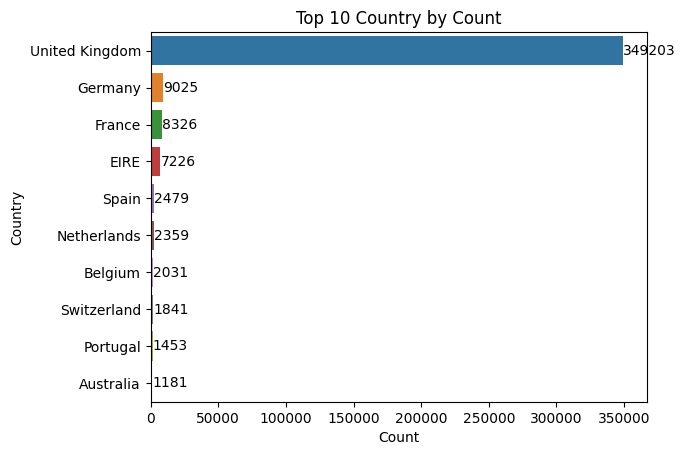

In [34]:
order_by_country = data['Country'].value_counts().head(10)
show_top10_barplot(order_by_country, 'Count', 'Country')

In [35]:
data['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1713
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1389
                                      ... 
HOT WATER BOTTLE BABUSHKA LARGE          1
BIRTHDAY BANNER TAPE                     1
GLASS BEAD HOOP EARRINGS BLACK           1
PINK PAINTED KASHMIRI CHAIR              1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Description, Length: 3866, dtype: int64

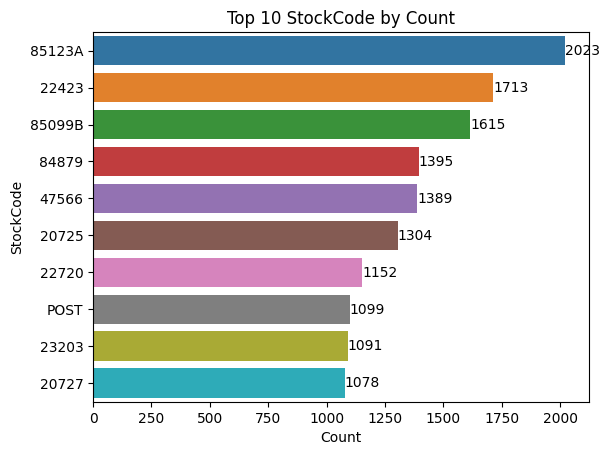

In [36]:
order_by_product = data['StockCode'].value_counts().head(10)
show_top10_barplot(order_by_product, 'Count', 'StockCode')

### Numerical features exploration

<Figure size 640x480 with 0 Axes>

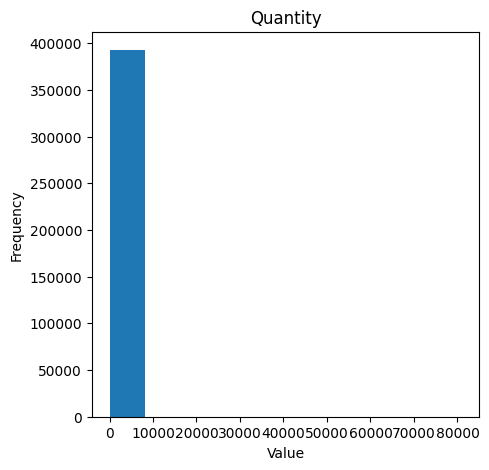

<Figure size 640x480 with 0 Axes>

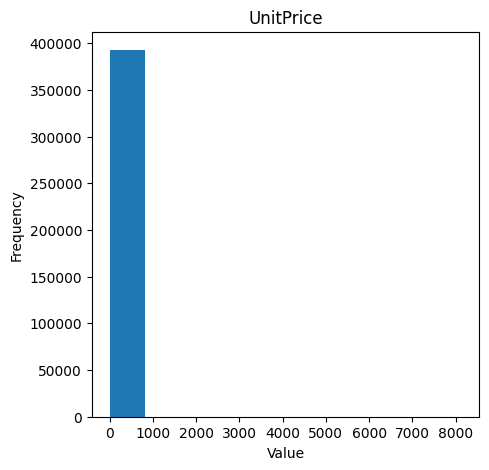

<Figure size 640x480 with 0 Axes>

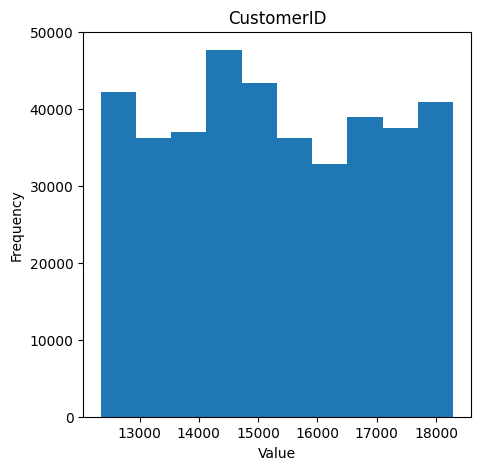

<Figure size 640x480 with 0 Axes>

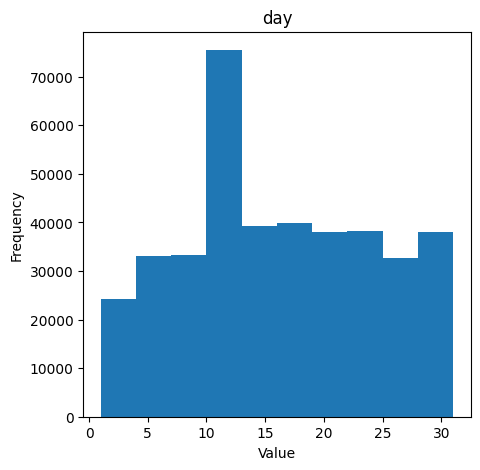

<Figure size 640x480 with 0 Axes>

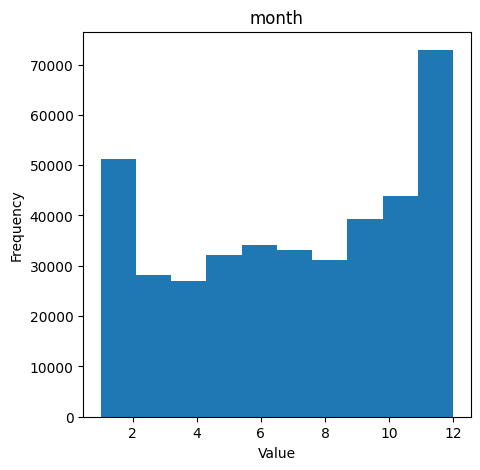

<Figure size 640x480 with 0 Axes>

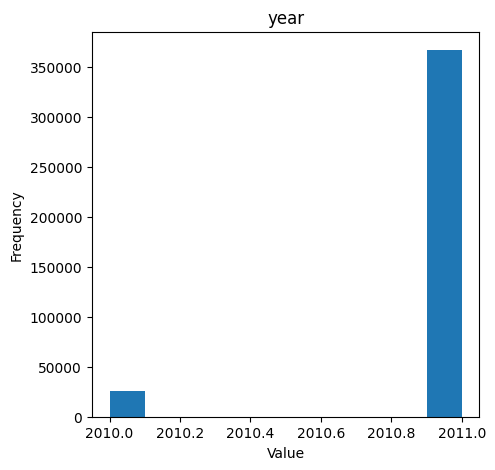

<Figure size 640x480 with 0 Axes>

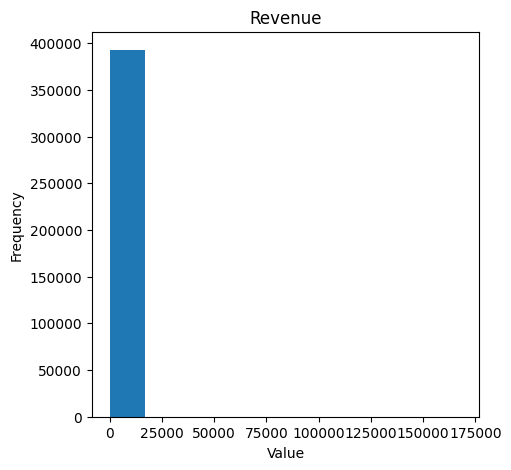

In [37]:
numerical_features = data.select_dtypes(include='number').columns

for feature in numerical_features:
    plt.figure()
    plt.figure(figsize=(5,5))
    data[feature].plot.hist()
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

From the histogram distribution, it can be observed that they have extreme outliers (except for customer id, day, month and year, which belong to the categorical type).


In [38]:
def show_summary(feature):
    print(f'Mean: ', statistics.mean(feature))
    print(f'Median: ', statistics.median(feature))
    print(f'Mode: ', statistics.mode(feature))
    print(f'Standard deviation: ', statistics.stdev(feature))
    print(f'Quartile range: Q1:', np.percentile(feature, 25), f'   Q2:', np.percentile(feature, 50),
    f'   Q3:', np.percentile(feature, 75))

In [39]:
def show_outliers(feature):
    Q1 = np.percentile(feature, 25)
    Q3 = np.percentile(feature, 75)

    IQR = Q3-Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return [lower_bound, upper_bound]

**Using IQR, outliers are values which are greater than Q3+1.5IQR or lower than Q1-1.5IQR*

In [40]:
show_summary(data['Quantity'])

Mean:  13.1197019547126
Median:  6.0
Mode:  1
Standard deviation:  180.49283198902432
Quartile range: Q1: 2.0    Q2: 6.0    Q3: 12.0


In [41]:
show_outliers(data['Quantity'])

[-13.0, 27.0]

In [42]:
show_summary(data['UnitPrice'])

Mean:  3.1259139070823956
Median:  1.95
Mode:  1.25
Standard deviation:  22.2418356140519
Quartile range: Q1: 1.25    Q2: 1.95    Q3: 3.75


In [43]:
show_outliers(data['UnitPrice'])

[-2.5, 7.5]

In [44]:
show_summary(data['Revenue'])

Mean:  22.6314997351614
Median:  12.45
Mode:  15.0
Standard deviation:  311.09922433480364
Quartile range: Q1: 4.949999999999999    Q2: 12.45    Q3: 19.799999999999997


In [45]:
show_outliers(data['Revenue'])

[-17.325, 42.074999999999996]

I'll drop some outliers to see their true distribution.

<Axes: xlabel='Revenue', ylabel='Count'>

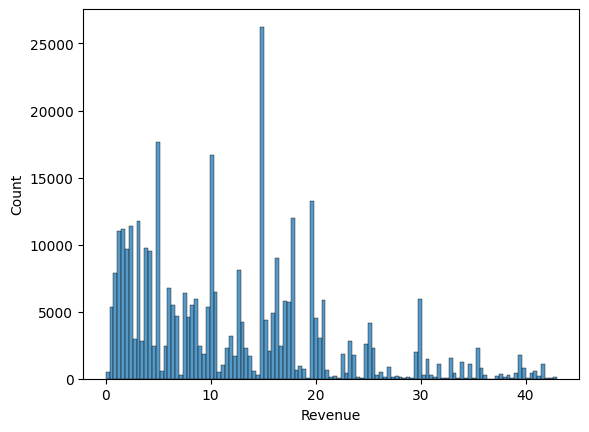

In [46]:
sns.histplot(data[data['Revenue'] < 43], x='Revenue')

<Axes: xlabel='UnitPrice', ylabel='Count'>

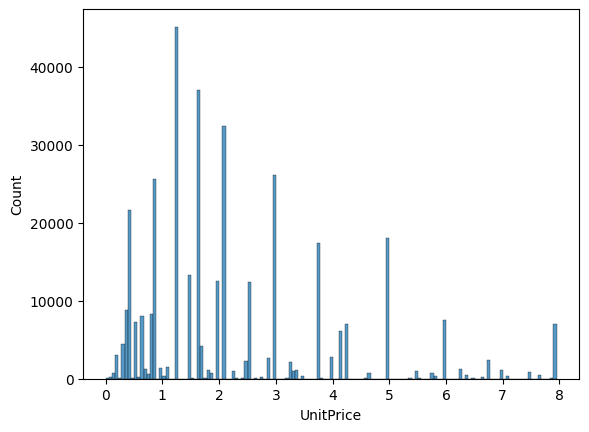

In [47]:
sns.histplot(data[data['UnitPrice'] < 8], x='UnitPrice')

<Axes: xlabel='Quantity', ylabel='Count'>

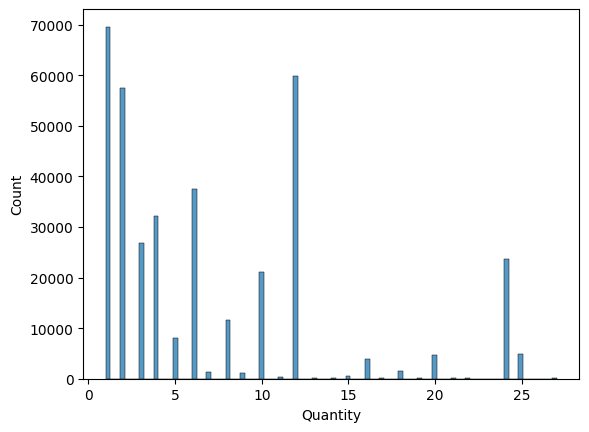

In [48]:
sns.histplot(data[data['Quantity'] < 28], x='Quantity')

<ipython-input-49-5f3d477cd391>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


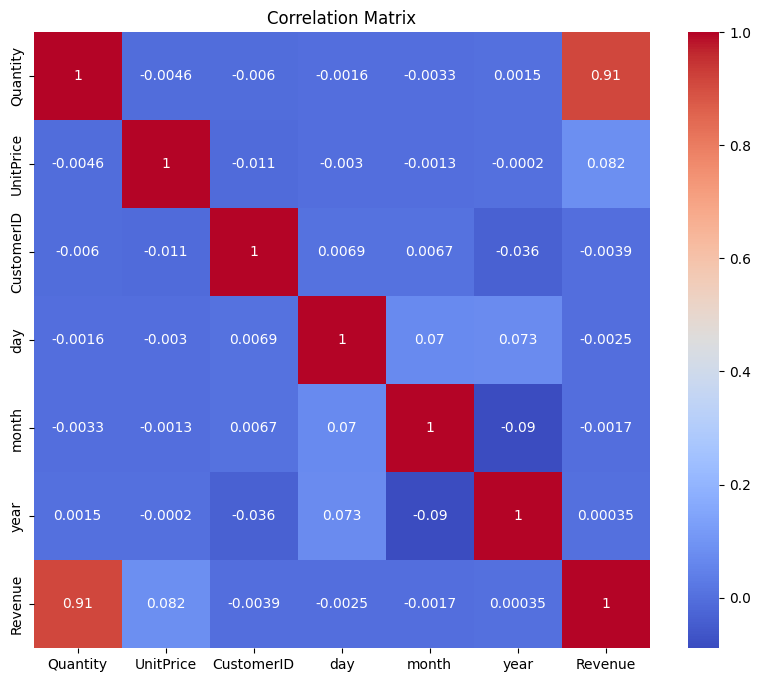

In [49]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')

plt.show()

Quantity and Revenue have a strong positive linear correlation (r=0.91). It means that as the quantity increases, the revenue increases, and vice versa.

In [50]:
data['year'].value_counts()

2011    367022
2010     25670
Name: year, dtype: int64

### Revenue Analysis

Understand revenue streams and sources. This involves examining various aspects, such as product categories, customer segments, sales channels, and geographic regions.

Because the UK is a significant market for Tata, I will analyze the revenue of this market separately compared to the other markets.

In [52]:
data_uk = data[data['Country'] == 'United Kingdom']
data_not_uk = data[data['Country'] != 'United Kingdom']

*1. Top performing products*

In [ ]:
revenue_by_stock = data.groupby('StockCode')['Revenue'].sum()

top10_revenue_by_stock = revenue_by_stock.sort_values(ascending=False).head(10)

In [ ]:
revenue_by_category = data.groupby('Description')['Revenue'].sum()

top10_revenue_by_category = revenue_by_category.sort_values(ascending=False).head(10)

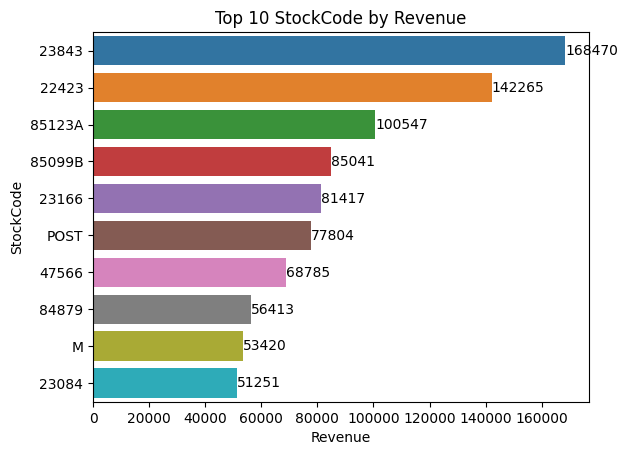

In [ ]:
show_top10_barplot(top10_revenue_by_stock, 'Revenue', 'StockCode')

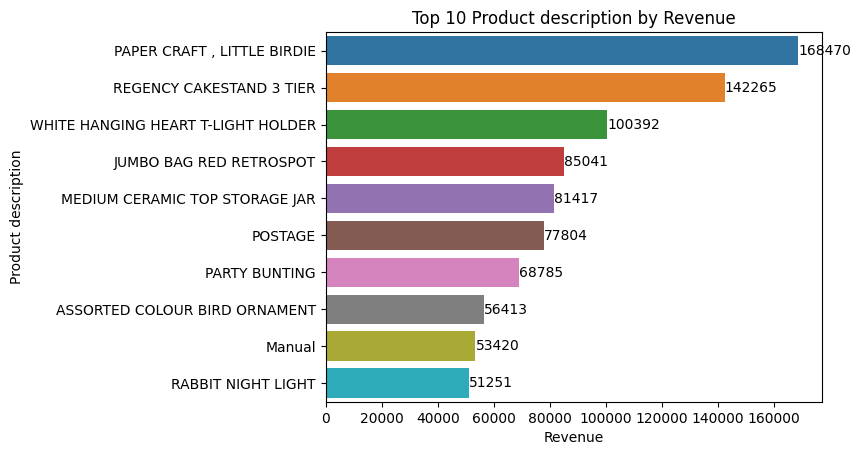

In [ ]:
show_top10_barplot(top10_revenue_by_category, 'Revenue', 'Product description')

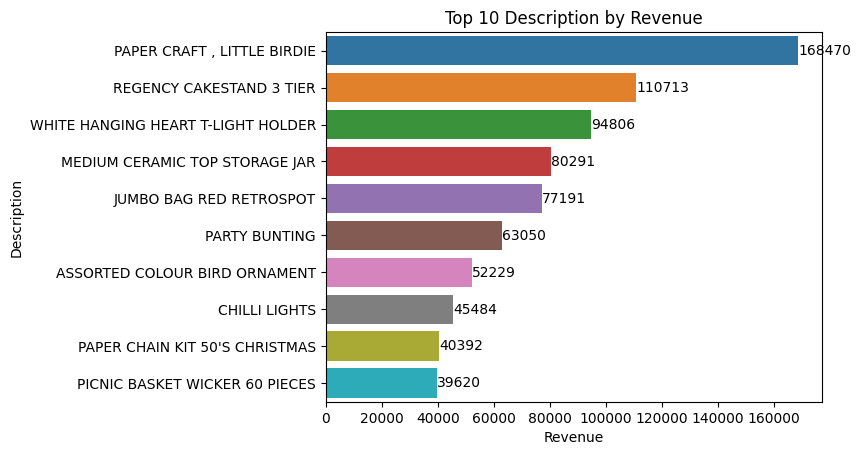

In [55]:
revenueuk_by_category = data_uk.groupby('Description')['Revenue'].sum()

top10_revenueuk_by_category = revenueuk_by_category.sort_values(ascending=False).head(10)

show_top10_barplot(top10_revenueuk_by_category, 'Revenue', 'Description')

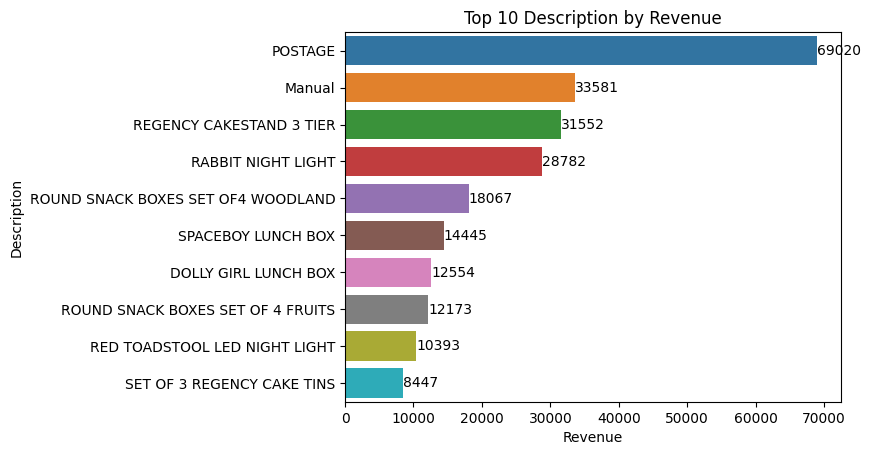

In [56]:
revenuenotuk_by_category = data_not_uk.groupby('Description')['Revenue'].sum()

top10_revenuenotuk_by_category = revenuenotuk_by_category.sort_values(ascending=False).head(10)

show_top10_barplot(top10_revenuenotuk_by_category, 'Revenue', 'Description')

*2. Top country by revenue*

In [ ]:
revenue_by_country = data.groupby('Country')['Revenue'].sum()

top10_revenue_by_country = revenue_by_country.sort_values(ascending=False).head(10)

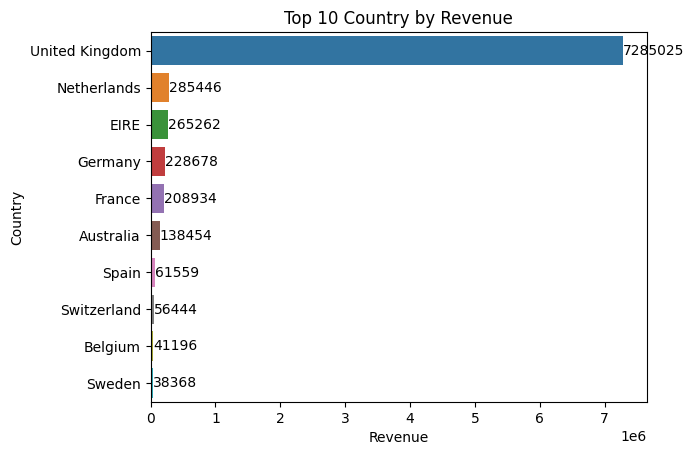

In [ ]:
show_top10_barplot(top10_revenue_by_country, 'Revenue', 'Country')

*3. Revenue by time and date*

In [ ]:
revenue_by_year = data.groupby('year')['Revenue'].sum()

In [ ]:
def show_piechart(feature):
    sns.set()

    plt.figure(figsize=(5, 5))
    plt.pie(feature.values, labels=feature.index, autopct='%1.1f%%', startangle=140)

    plt.axis('equal')

    plt.show()

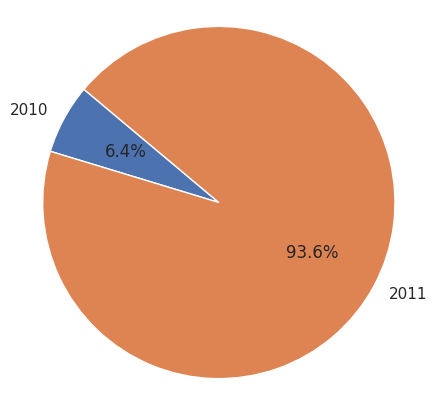

In [ ]:
show_piechart(revenue_by_year)

In [ ]:
revenue_by_month = data.groupby('month')['Revenue'].sum()

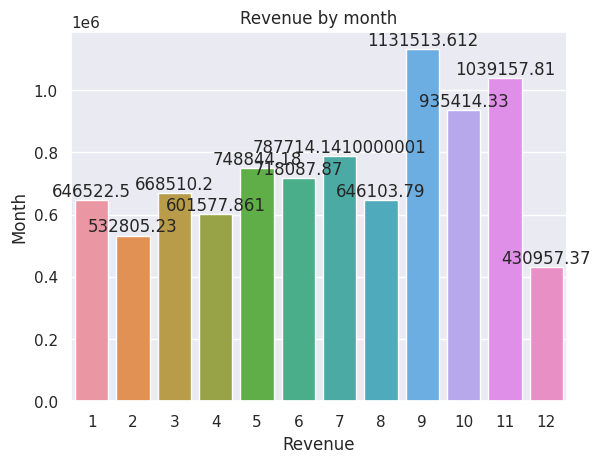

In [ ]:
sns.barplot(x=revenue_by_month.index, y=revenue_by_month.values)

plt.xlabel('Revenue')
plt.ylabel('Month')
plt.title('Revenue by month')

for i, value in enumerate(revenue_by_month.values):
    plt.annotate(value, (i, value), ha='center', va='bottom')

plt.show()

### Customer Segmentation

Using RFM models.

RFM stands for Recency, Frequency, Monetary – a model used to construct customer segments based on shopping behavior. Building customer segments holds significance in marketing as it enables the formulation of specific marketing/care strategies for each segmented group, thereby tailoring approaches for individual segments.

R - Recency: How recent customer bought = now - last_purchase_date

F - Frequency: How often they bought = total number of orders

M - Money: How much they bought = total money spent

In [ ]:
now = dt.datetime(2012, 1, 1)

In [ ]:
data_recency = data.copy()
data_recency = data.groupby(by='CustomerID', as_index=False)['InvoiceDate'].max()
data_recency.columns = ['CustomerID','RecentDate']

In [ ]:
data_recency['Recency'] = data_recency['RecentDate'].apply(lambda x: (now-x).days)
data_recency = data_recency.drop(columns={'RecentDate'})

In [ ]:
data_recency

,CustomerID,Recency
0,12346.0,347
1,12347.0,61
2,12348.0,97
3,12349.0,40
4,12350.0,332
...,...,...
4333,18280.0,181
4334,18281.0,25
4335,18282.0,237
4336,18283.0,31


In [ ]:
data_frequency = data.copy()
data_frequency = data.groupby(by='CustomerID', as_index=False)['InvoiceNo'].nunique()
data_frequency.columns = ['CustomerID','Frequency']

In [ ]:
data_frequency

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4333,18280.0,1
4334,18281.0,1
4335,18282.0,2
4336,18283.0,16


In [ ]:
data_monetary = data.copy()
data_monetary = data.groupby(by='CustomerID', as_index=False)['Revenue'].sum()
data_monetary.columns = ['CustomerID','Monetary']

In [ ]:
data_monetary

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4333,18280.0,180.60
4334,18281.0,80.82
4335,18282.0,178.05
4336,18283.0,2045.53


In [ ]:
rfm = data_recency.merge(data_frequency, on='CustomerID', how='outer').merge(data_monetary, on='CustomerID', how='outer')

In [ ]:
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,347,1,77183.60
1,12347.0,61,7,4310.00
2,12348.0,97,4,1797.24
3,12349.0,40,1,1757.55
4,12350.0,332,1,334.40
...,...,...,...,...
4333,18280.0,181,1,180.60
4334,18281.0,25,1,80.82
4335,18282.0,237,2,178.05
4336,18283.0,31,16,2045.53


After obtaining the respective scores, I'll divide them into 5 segments to categorize the customer files.


In [ ]:
rfmSegmentation1 = rfm.copy()

In [ ]:
rfmSegmentation1['RScore'] = pd.qcut(rfmSegmentation1['Recency'], q=5, labels=[5, 4, 3, 2, 1])
rfmSegmentation1['FScore'] = pd.qcut(rfmSegmentation1['Frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])
rfmSegmentation1['MScore'] = pd.qcut(rfmSegmentation1['Monetary'], q=5, labels=[1, 2, 3, 4, 5])

In [ ]:
rfmSegmentation1['rfmscore'] = rfmSegmentation1['RScore'].astype(str) + rfmSegmentation1['FScore'].astype(str) + rfmSegmentation1['FScore'].astype(str)

In [ ]:
rfmSegmentation1.head()

,CustomerID,Recency,Frequency,Monetary,RScore,FScore,MScore,rfmscore
0,12346.0,347,1,77183.60,1,1,5,111
1,12347.0,61,7,4310.00,4,5,5,455
2,12348.0,97,4,1797.24,3,4,4,344
3,12349.0,40,1,1757.55,4,1,4,411
4,12350.0,332,1,334.40,1,1,2,111


In [ ]:
seg_map = {
    r'[4-5][4-5][4-5]': 'Champions',
    r'[2-4][3-4][4-5]': 'Loyal Customers',
    r'[3-5][1-3][1-3]': 'Potential Loyalists',
    r'[4-5][1-2][1-2]': 'New Customers',
    r'[3-4][1-2][1-2]': 'Promising',
    r'[3-4][3-4][3-4]': 'Need Attention',
    r'[2-3][1-3][1-3]': 'About To Sleep',
    r'[1-3][2-5][2-5]': 'At Risk',
    r'[1-2][4-5][4-5]': 'Can\'t Lose Them',
    r'[2-3][2-3][2-3]': 'Hibernating',
    r'[1-2][1-2][1-2]': 'Lost'
}

rfmSegmentation1['segment'] = rfmSegmentation1['rfmscore'].replace(seg_map, regex=True)

In [ ]:
rfmSegmentation1.head()

,CustomerID,Recency,Frequency,Monetary,RScore,FScore,MScore,rfmscore,segment
0,12346.0,347,1,77183.60,1,1,5,111,Lost
1,12347.0,61,7,4310.00,4,5,5,455,Champions
2,12348.0,97,4,1797.24,3,4,4,344,Loyal Customers
3,12349.0,40,1,1757.55,4,1,4,411,Potential Loyalists
4,12350.0,332,1,334.40,1,1,2,111,Lost


In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,time,day,month,year,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,08:26:00,12,1,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,08:26:00,12,1,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,08:26:00,12,1,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,08:26:00,12,1,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,08:26:00,12,1,2010,20.34


In [ ]:
data.to_csv('Retail data.csv')
rfmSegmentation1.to_csv('Customer segmentation.csv')